In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")

In [156]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [157]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [159]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

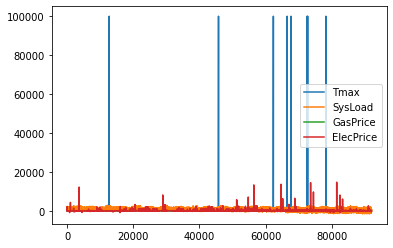

In [160]:
df.plot()
plt.show()

In [161]:
#converting full date column to date time
df["FullDate"] = pd.to_datetime(df["FullDate"])

In [162]:
df1 = df.copy()

In [163]:
df.set_index("FullDate", inplace = True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       92016 non-null  float64
 1   SysLoad    92016 non-null  float64
 2   GasPrice   92016 non-null  float64
 3   ElecPrice  92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [111]:
df_daily = df.resample( 'D' ).mean()

In [112]:
from statsmodels.tsa.stattools import adfuller  
adf_result = adfuller(df_daily['SysLoad'])  
print(f'ADF Statistic: {adf_result[ 0 ]}')  
print(f'p-value: {adf_result[ 1 ]}')  
print(f'No. of lags used: {adf_result[2]}')  
print(f'No. of observations used:{adf_result[3]}')  
print('Critical    Values:' )  
for k, v in  adf_result[ 4 ].items():  
  print( f'{k} :{v} ' )

ADF Statistic: -3.6901589888366413
p-value: 0.0042537255045741835
No. of lags used: 30
No. of observations used:3803
Critical    Values:
1% :-3.432070672988693 
5% :-2.8623002987378547 
10% :-2.567174716967499 


In [113]:
from statsmodels.tsa.stattools import adfuller  
adf_result = adfuller(df_daily['GasPrice'])  
print(f'ADF Statistic: {adf_result[ 0 ]}')  
print(f'p-value: {adf_result[ 1 ]}')  
print(f'No. of lags used: {adf_result[2]}')  
print(f'No. of observations used:{adf_result[3]}')  
print('Critical    Values:' )  
for k, v in  adf_result[ 4 ].items():  
  print( f'{k} :{v} ' )

ADF Statistic: -2.902766697165181
p-value: 0.045027212884625294
No. of lags used: 27
No. of observations used:3806
Critical    Values:
1% :-3.4320693157877544 
5% :-2.8622996992165364 
10% :-2.5671743978048323 


Fitting the Facebook prophet

In [114]:
df1_ufp = df1.drop(columns = ["Tmax", "SysLoad","GasPrice"], axis = 1)

In [115]:
df1_ufp

,FullDate,ElecPrice
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030
...,...,...
92011,2021-02-28 19:00:00,117.925
92012,2021-02-28 20:00:00,87.880
92013,2021-02-28 21:00:00,62.060
92014,2021-02-28 22:00:00,62.000


In [116]:
len(df1_ufp)

92016

In [136]:
df1_ufp.columns = ["ds", "y"]
df1_ufp["ds"] = df1["FullDate"]
df1_ufp["y"] = df1["ElecPrice"]

In [137]:
train_data = df1_ufp[:2758]
test_data = df1_ufp[-2758:]

In [120]:
train_data

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030
...,...,...
2753,2010-12-24 17:00:00,35.060
2754,2010-12-24 18:00:00,27.980
2755,2010-12-24 19:00:00,28.115
2756,2010-12-24 20:00:00,27.690


In [121]:
model = Prophet() #defining the model

In [122]:
model.fit(df1_ufp) #fitting the model

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwwo94vwk/5y5oqqn3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwwo94vwk/jdf4gzyn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9424', 'data', 'file=/tmp/tmpwwo94vwk/5y5oqqn3.json', 'init=/tmp/tmpwwo94vwk/jdf4gzyn.json', 'output', 'file=/tmp/tmp5ix7i34w/prophet_model-20221003150517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:05:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [123]:


forecast = model.predict(test_data)

In [124]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

                   ds       yhat  yhat_lower  yhat_upper
0 2020-11-06 02:00:00   7.216941 -259.591101  263.324492
1 2020-11-06 03:00:00  -3.186509 -269.253584  257.106845
2 2020-11-06 04:00:00  -6.445126 -267.810455  229.493569
3 2020-11-06 05:00:00   0.162824 -258.974383  278.033417
4 2020-11-06 06:00:00  12.269865 -234.978421  286.937106


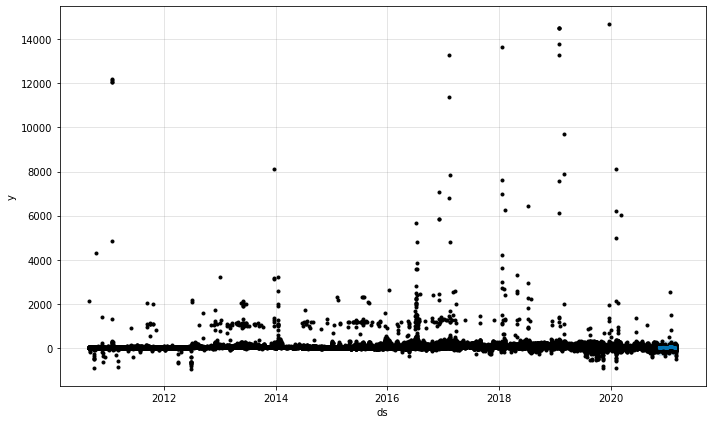

In [125]:
model.plot(forecast)
plt.show()

In [126]:
#forecasting on the test set
forecast_test = model.predict(test_data)

In [127]:
print(forecast_test[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

                   ds       yhat  yhat_lower  yhat_upper
0 2020-11-06 02:00:00   7.216941 -236.841552  274.244039
1 2020-11-06 03:00:00  -3.186509 -294.517769  270.142280
2 2020-11-06 04:00:00  -6.445126 -277.460009  260.707258
3 2020-11-06 05:00:00   0.162824 -272.657935  262.885190
4 2020-11-06 06:00:00  12.269865 -254.406298  289.115964


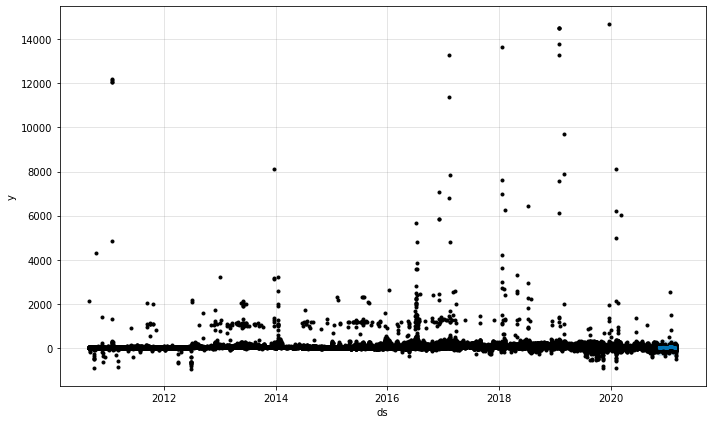

In [128]:
model.plot(forecast_test)
plt.show()

MAE: 38.484


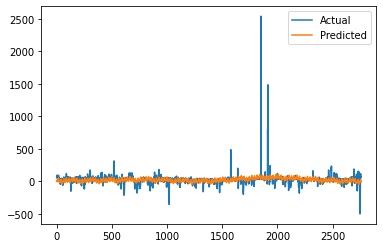

In [130]:

# calculate MAE between expected and predicted values for december
y_true = df1_ufp['y'][-2758:].values
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [139]:
# calculate MAPE between expected and predicted values
y_true = df1_ufp['y'][-2758:].values
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %.3f' % mae)

MAPE: 64962258362450.484


In [132]:
# calculate MAE between expected and predicted values for december
y_true = df1_ufp['y'][-2758:].values
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_true, y_pred)
Rmse = np.sqrt(mse)
round(Rmse,3)

76.084

Multivariate time series

In [150]:
df1.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [164]:
df1["ds"] = df1["FullDate"]
df1["y"] = df1["ElecPrice"]
df1["add1"] = df1["SysLoad"]
df1["add2"] = df1["Tmax"]
df1["add3"] = df1["GasPrice"]

In [165]:
df1.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice,ds,y,add1,add2,add3
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710,2010-09-01 00:00:00,23.710,1688.215,15.8,3.69
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635,2010-09-01 01:00:00,22.635,1669.195,15.8,3.69
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565,2010-09-01 02:00:00,22.565,1491.980,15.8,3.69
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910,2010-09-01 03:00:00,18.910,1330.760,15.8,3.69
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030,2010-09-01 04:00:00,18.030,1247.940,15.8,3.69


Splitting into training and test set

In [166]:
df_mfp = df1.drop(columns = ["FullDate", "ElecPrice","SysLoad","Tmax","GasPrice"])

In [167]:
df_mfp.head()

,ds,y,add1,add2,add3
0,2010-09-01 00:00:00,23.710,1688.215,15.8,3.69
1,2010-09-01 01:00:00,22.635,1669.195,15.8,3.69
2,2010-09-01 02:00:00,22.565,1491.980,15.8,3.69
3,2010-09-01 03:00:00,18.910,1330.760,15.8,3.69
4,2010-09-01 04:00:00,18.030,1247.940,15.8,3.69


In [168]:
#Splitting into training and test set
train_df = df_mfp[0:2758]
test_df = df_mfp[-2758:]
print(train_df)

                      ds       y        add1  add2    add3
0    2010-09-01 00:00:00  23.710  1688.21500  15.8  3.6900
1    2010-09-01 01:00:00  22.635  1669.19500  15.8  3.6900
2    2010-09-01 02:00:00  22.565  1491.98000  15.8  3.6900
3    2010-09-01 03:00:00  18.910  1330.76000  15.8  3.6900
4    2010-09-01 04:00:00  18.030  1247.94000  15.8  3.6900
...                  ...     ...         ...   ...     ...
2753 2010-12-24 17:00:00  35.060  1869.43815  33.3  3.0988
2754 2010-12-24 18:00:00  27.980  1836.26230  33.3  3.0988
2755 2010-12-24 19:00:00  28.115  1716.70845  33.3  3.0988
2756 2010-12-24 20:00:00  27.690  1562.13960  33.3  3.0988
2757 2010-12-24 21:00:00  24.870  1513.57905  33.3  3.0988

[2758 rows x 5 columns]


In [169]:
model = Prophet()
model.add_regressor("add1", standardize = True)
model.add_regressor("add2", standardize = False)
model.add_regressor("add3", standardize = False )

In [170]:
model.fit(df_mfp)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwwo94vwk/2sjdt4dy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwwo94vwk/ucoebo_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77571', 'data', 'file=/tmp/tmpwwo94vwk/2sjdt4dy.json', 'init=/tmp/tmpwwo94vwk/ucoebo_e.json', 'output', 'file=/tmp/tmprkv7xndr/prophet_model-20221003153418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:34:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:34:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [171]:
test_df.head()

,ds,y,add1,add2,add3
89258,2020-11-06 02:00:00,57.400,786.49740,18.2,5.8
89259,2020-11-06 03:00:00,55.320,676.84685,18.2,5.8
89260,2020-11-06 04:00:00,62.580,692.20005,18.2,5.8
89261,2020-11-06 05:00:00,67.685,673.36585,18.2,5.8
89262,2020-11-06 06:00:00,95.965,807.80015,18.2,5.8


In [172]:
#forecasting  
forecast_testmfp = model.predict(test_df)

In [173]:
print(forecast_testmfp[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

                   ds       yhat  yhat_lower  yhat_upper
0 2020-11-06 02:00:00  66.078488 -184.342660  320.892112
1 2020-11-06 03:00:00  53.591263 -216.227422  323.002276
2 2020-11-06 04:00:00  58.118476 -216.731526  335.497312
3 2020-11-06 05:00:00  68.549760 -202.724247  339.064084
4 2020-11-06 06:00:00  88.598555 -171.613307  345.652398


MAE: 39.769


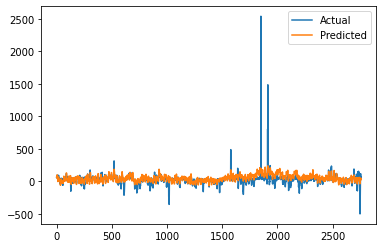

In [176]:
# calculate MAE between expected and predicted values
y_true = df_mfp['y'][-2758:].values
y_pred = forecast_testmfp['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()